## Практическое задание. Урок 4. Визуальный анализ данных

### Условие 1: Задача 1

- Постройте график
- Назовите график
- Сделайте именование оси x и оси y
- Сделайте выводы

- 1.1. Скачать данные по ссылке [https://www.kaggle.com/datasets/ionaskel/laptop-prices](https://www.kaggle.com/datasets/ionaskel/laptop-prices)

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


- 1.2 Изучите стоимости недвижимости

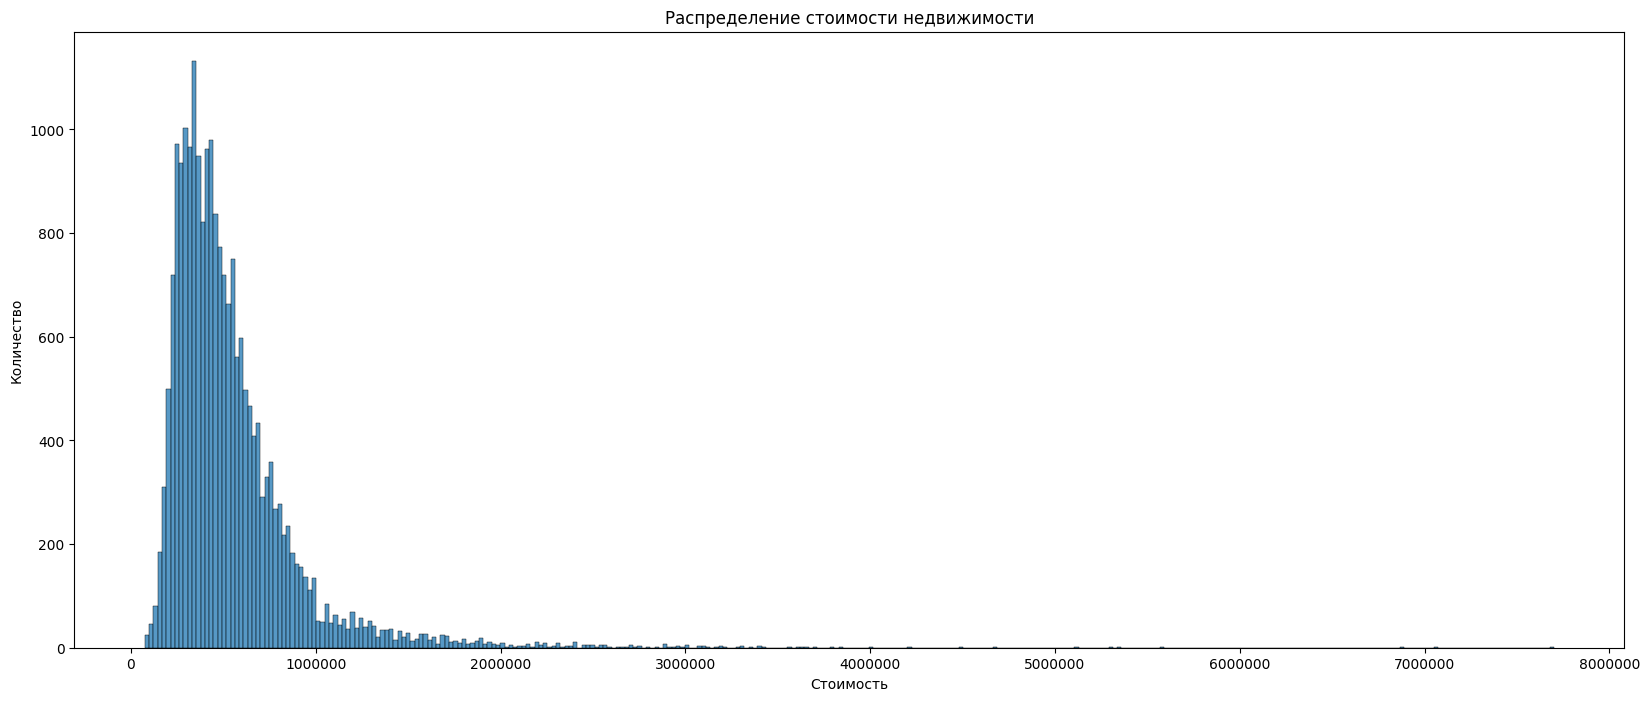

In [22]:
plt.figure(figsize=(20, 8))
sns.histplot(df['price'])
plt.ticklabel_format(style='plain')
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Стоимость')
plt.ylabel('Количество')
df['price'].describe();

*Распределение стоимости недвижимости, показало, что большинство домов ~ 1 млн.*

- 1.3 Изучите распределение квадратуры жилой

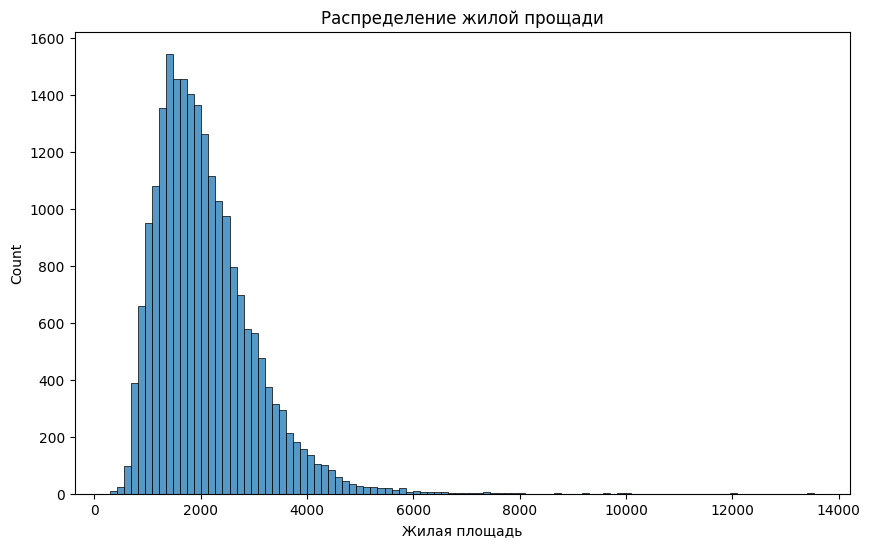

In [23]:
plt.figure(figsize=(10, 6))
sns.histplot(df['sqft_living'], bins=100)
plt.title('Распределение жилой прощади')
plt.xlabel('Жилая площадь')
df['sqft_living'].describe();

*Большинство домов имеют от 2000 до 3000 квадратных метров жилой площади*

- 1.4 Изучите распределение года постройки

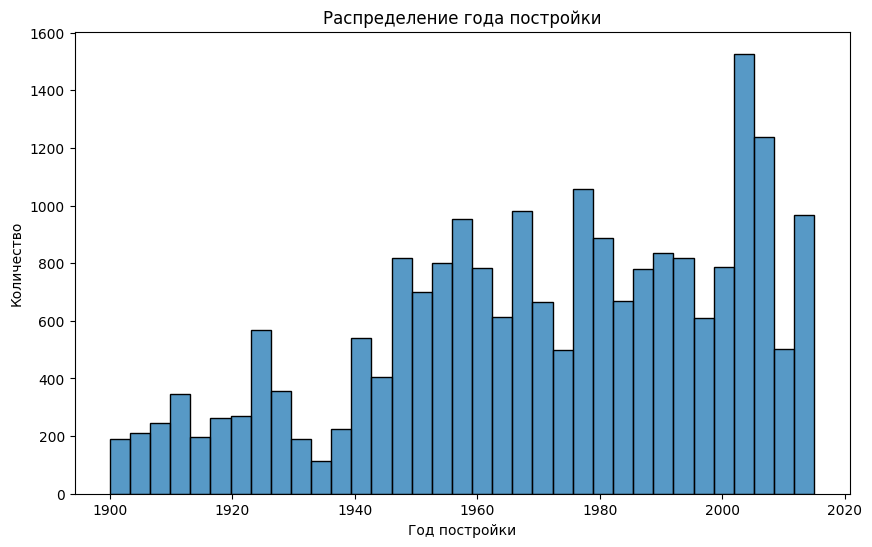

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['yr_built'])
plt.ticklabel_format(style='plain')
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Количество');

*Распределение года постройки, показало, что стабильное количество было на уровне - 1950-2000 г, но после 2000-2009 г произошел резкий скачок.*

### Условие 2: 2 задача
2.1 Изучите распределение домов от наличия вида на набережную
- Постройте график
- Сделайте выводы

In [25]:
data1 = df['waterfront'].value_counts()
data1.index = ['нет вида', 'есть вид']
data1.head()

нет вида    21450
есть вид      163
Name: waterfront, dtype: int64

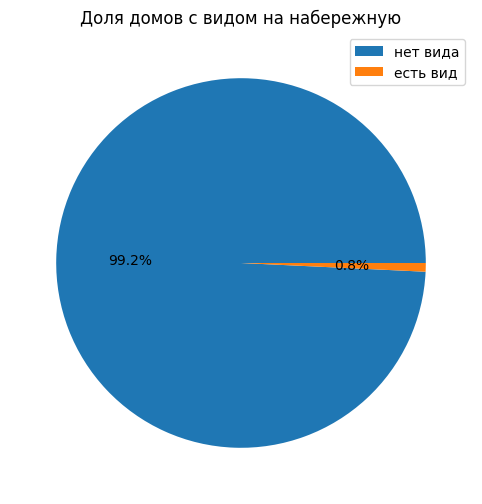

In [26]:
plt.figure(figsize=(10, 6))
plt.pie(data1, autopct='%1.1f%%')
plt.title('Доля домов с видом на набережную')
plt.legend(data1.index);

*Распределение домов от наличия вида на набережную, показало, что только 0.8 % домов имеют вид на набережную.*

- 2.2 Изучите распределение этажей домов

In [27]:
data2 = df['floors'].value_counts()
data2

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

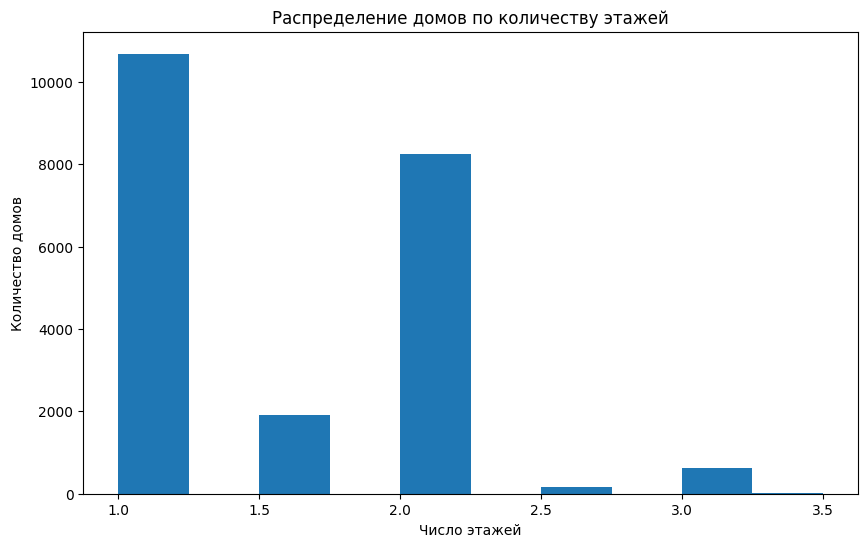

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(df['floors'])
plt.title('Распределение домов по количеству этажей')
plt.xlabel('Число этажей')
plt.ylabel('Количество домов');

*Распределение этажей домов, показало, в основном, дома имеют 1 и 2 этажа.*

- 2.3 Изучите распределение состояния домов

In [29]:
data3 = df['condition'].value_counts()
data3

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

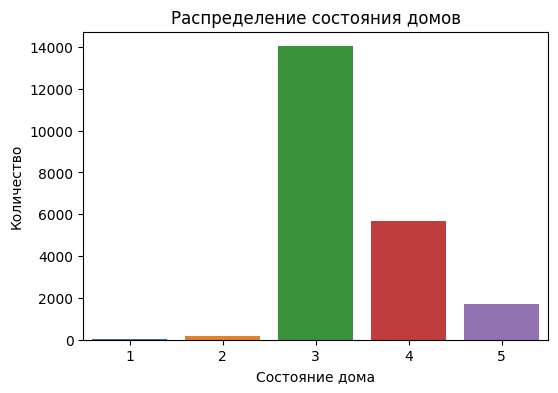

In [30]:
plt.figure(figsize=(6, 4))
sns.barplot(x = data3.index, y = data3)
plt.title('Распределение состояния домов')
plt.xlabel('Состояние дома')
plt.ylabel('Количество');

*Распределение состояния домов, показало, что большинство домов оценены в 3 балла, а меньше всего 1*

### Условие 3: 3 задача

- Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
- Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [31]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

c:\Windows\Temp\ipykernel_12096\4194942596.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


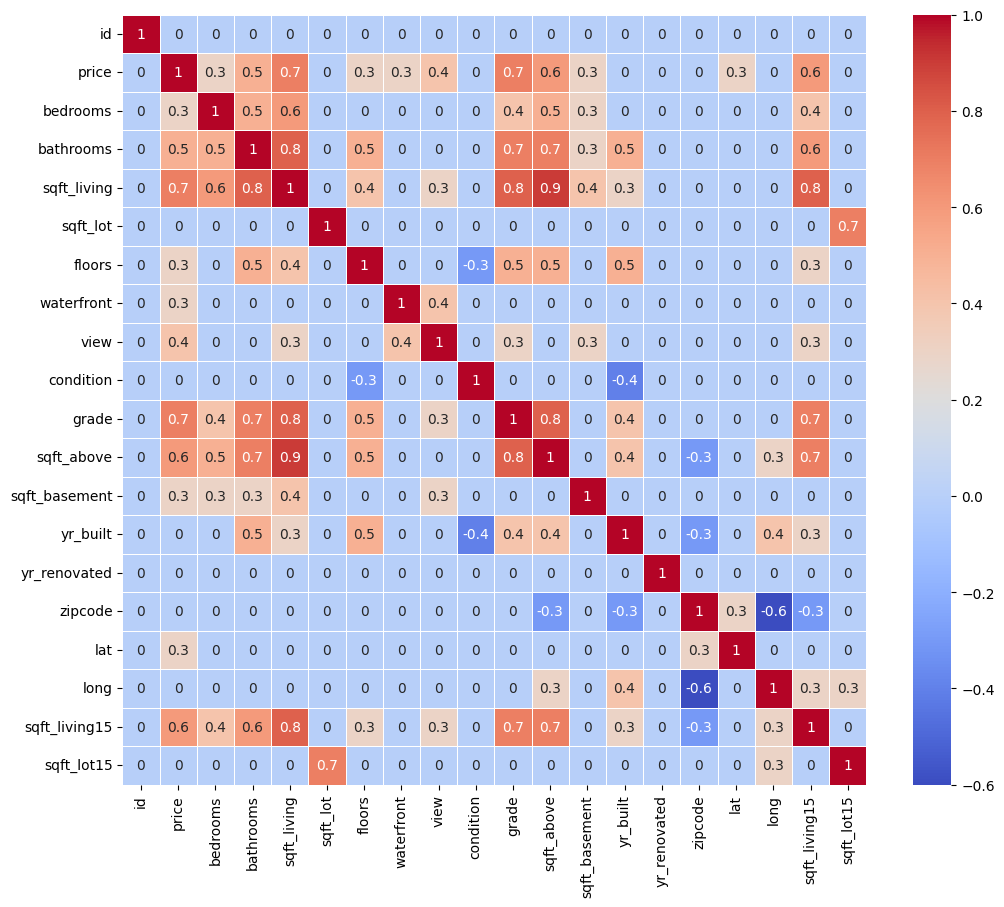

In [32]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm');

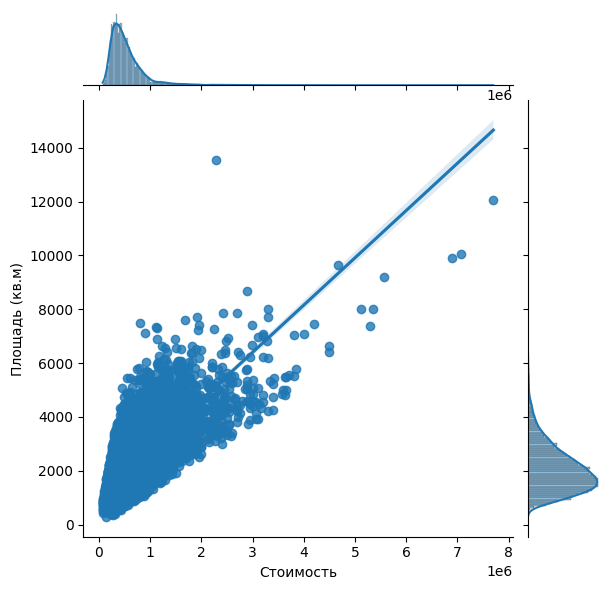

In [33]:
sns.jointplot(x=df['price'], y=df['sqft_living'], kind='reg')
plt.xlabel('Стоимость')
plt.ylabel('Площадь (кв.м)');

*Вывод: Чем больше площадь дома, тем выше его стоимость*

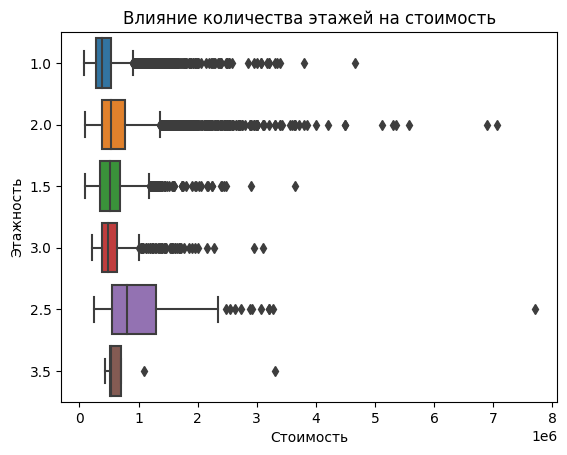

In [34]:
sns.boxplot(x=df['price'], y=df['floors'].astype('str'), whis=1.5);
plt.xlabel('Стоимость')
plt.ylabel('Этажность')
plt.title('Влияние количества этажей на стоимость');

*Вывод: Наибольшую стоимость имеют дома с количеством этажей 2,5*

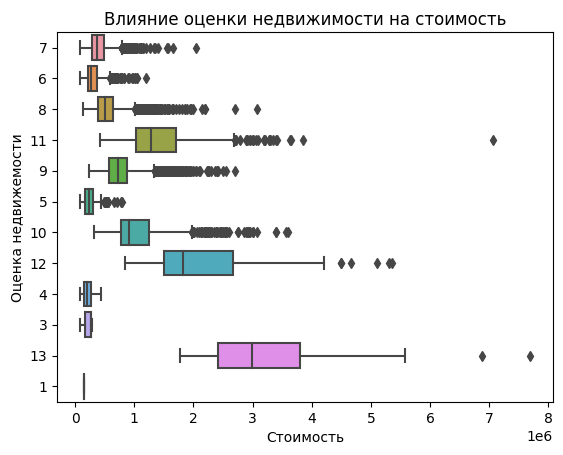

In [35]:
sns.boxplot(x=df['price'], y=df['grade'].astype('str'), whis=1.5);
plt.xlabel('Стоимость')
plt.ylabel('Оценка недвижемости')
plt.title('Влияние оценки недвижимости на стоимость');

*Вывод: Наибольшую стоимость имеют дома с оценкой конструкции и дизайна 13*

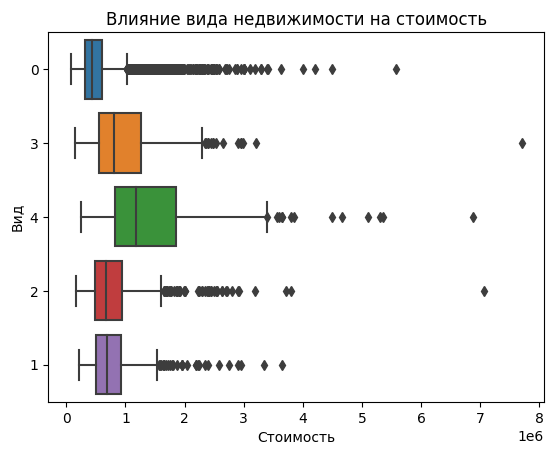

In [36]:
sns.boxplot(x=df['price'], y=df['view'].astype('str'), whis=1.5);
plt.xlabel('Стоимость')
plt.ylabel('Вид')
plt.title('Влияние вида недвижимости на стоимость');

*Вывод: Наибольшую стоимость имеют дома с оценкой вида 4*

`Вывод. Из графиков выше видно, что из 5 характеристик недвижимости больше всего влияют на её стоимость площадь недвижимости и количество этажей, но не выше 2.5.`